# Set up

In [1]:
# update path with data dir
import sys
sys.path.append('../../data/')

In [2]:
import warnings
# warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import patsy
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

/home/tom/footbot/venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Getting data

In [4]:
file_name = '../csvs/element_gameweek_features_v05.csv'

In [5]:
element_gameweek_df = pd.read_csv(file_name)

In [6]:
current_event = 20

In [7]:
element_gameweek_df =\
element_gameweek_df[
    (element_gameweek_df['event'] <= current_event)
]

In [8]:
element_gameweek_df.fillna(3, inplace=True)

In [9]:
element_gameweek_df = element_gameweek_df[element_gameweek_df['rolling_avg_minutes_element_p3'] >= 60]

# Modelling data

## Splitting data

In [10]:
last_train_event = 15

In [11]:
test_fold = [-1 if i <= last_train_event else 0 for i in element_gameweek_df['event']]
ps = PredefinedSplit(test_fold)

In [12]:
for train_index, test_index in ps.split():
    element_gameweek_df_train, element_gameweek_df_test = \
    element_gameweek_df.copy().iloc[train_index], element_gameweek_df.copy().iloc[test_index]

## Building model

In [81]:
formula = \
'total_points ~ C(element_type) + C(team) + C(opposition_team) + ' + \
' + '.join([i for i in element_gameweek_df.columns if i not in
 [
     'safe_web_name',
     'element',
     'event',
     'fixture',
     'team',
     'opposition_team',
     'element_type',
     'minutes',
     'rolling_value_points',
     'total_points',
     'rolling_avg_total_points_against_opposition_team_element_type_home',
     'rolling_avg_total_points_against_opposition_team_element_type_away'
 ]])

In [82]:
print(formula)

total_points ~ C(element_type) + C(team) + C(opposition_team) + was_home + is_sunday + is_weekday + is_early + is_late + value + rolling_avg_total_points_element + rolling_max_total_points_element + has_high_points_ever_element + rolling_avg_bps_element + rolling_avg_bonus_element + rolling_avg_goals_scored_element + rolling_avg_minutes_element + rolling_avg_clean_sheets_element + rolling_avg_completed_passes_element + rolling_avg_recoveries_element + rolling_avg_assists_element + rolling_avg_key_passes_element + rolling_avg_winning_goals_element + rolling_avg_tackled_element + rolling_avg_dribbles_element + rolling_avg_clearances_blocks_interceptions_element + rolling_avg_big_chances_created_element + rolling_avg_target_missed_element + rolling_avg_fouls_element + rolling_avg_tackles_element + rolling_avg_open_play_crosses_element + rolling_avg_offside_element + rolling_avg_big_chances_missed_element + rolling_avg_saves_element + rolling_avg_goals_conceded_element + rolling_avg_minute

In [83]:
y, X = patsy.dmatrices(formula, element_gameweek_df, return_type='matrix')

In [84]:
for train_index, test_index in ps.split():
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [85]:
n_features = X.shape[1]

## Selecting features

In [18]:
estimator = DecisionTreeRegressor(min_samples_leaf=0.03)
selector = RFECV(estimator, step=1,
                 scoring='neg_mean_squared_error',
                 cv=ps, n_jobs=1, verbose=1)
selector.fit(X, y.ravel())

Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
Fitting estimator with 415 features.
Fitting estimator with 414 features.
Fitting estimator with 413 features.
F

Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
F

Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
Fitting estimator with 415 features.
Fitting estimator with 414 features.
Fitting estimator with 413 features.
Fitting estimator with 412 features.
Fitting estimator with 411 features.
Fitting estimator with 410 features.
Fitting estimator with 409 features.
Fitting estimator with 408 features.
Fitting estimator with 407 features.
Fitting estimator with 406 features.
Fitting estimator with 405 features.
Fitting estimator with 404 features.
Fitting estimator with 403 features.
Fitting estimator with 402 features.
F

Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
F

RFECV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
      estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                      max_features=None, max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=0.03,
                                      min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      presort=False, random_state=None,
                                      splitter='best'),
      min_features_to_select=1, n_jobs=1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [19]:
features = patsy.dmatrices(formula, element_gameweek_df, return_type='dataframe')[1].columns
selected_features = pd.Series(features)[selector.support_]
list(selected_features)

['value', 'expected_total_points_against_opposition_team']

In [20]:
stark_X_sel = X[:,selector.support_]
stark_X_train_sel = X_train[:,selector.support_]
stark_X_test_sel = X_test[:,selector.support_]

In [86]:
lush_X_sel = X
lush_X_train_sel = X_train
lush_X_test_sel = X_test

## Tuning model

### GP tuner

#### Decision tree (lush)

In [87]:
lush_space = [
    Real(0.01, 0.1, 'uniform', name='min_samples_leaf'),
]

In [88]:
lush_gp_model = DecisionTreeRegressor()

@use_named_args(lush_space)
def lush_objective(**params):
    lush_gp_model.set_params(**params)

    return -np.mean(
        cross_val_score(
            lush_gp_model,
            lush_X_sel, y.ravel(),
            cv=ps,
            n_jobs=1,
            scoring="neg_mean_squared_error"))

In [91]:
lush_res_gp_arr = []
for i in range(1, 4):
    print('minimisation iteration', i)
    lush_res_gp = gp_minimize(lush_objective, lush_space, n_calls=50, verbose=2)
    lush_res_gp_arr.append(lush_res_gp)

minimisation iteration 1
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0329
Function value obtained: 9.7660
Current minimum: 9.7660
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0396
Function value obtained: 9.8975
Current minimum: 9.7660
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0526
Function value obtained: 10.1373
Current minimum: 9.7660
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0336
Function value obtained: 9.8043
Current minimum: 9.7660
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0410
Function value obtained: 9.8459
Current minimum: 9.7660
Iteration

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 1.6595
Function value obtained: 9.7660
Current minimum: 9.7660
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.3207
Function value obtained: 9.9373
Current minimum: 9.7660
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.4394
Function value obtained: 9.8912
Current minimum: 9.7660
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 2.1201
Function value obtained: 9.7660
Current minimum: 9.7660
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 2.0256
Function value obtained: 9.9739
Current minimum: 9.7660
Iteration No: 46 started. Sea

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.5681
Function value obtained: 9.8045
Current minimum: 9.7474
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 1.0503
Function value obtained: 10.1585
Current minimum: 9.7474
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 1.3015
Function value obtained: 9.8972
Current minimum: 9.7474
Iteration No: 35 started. Searching for the next optimal point.


/home/tom/footbot/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 1.1572
Function value obtained: 9.8316
Current minimum: 9.7474
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.2379
Function value obtained: 9.8045
Current minimum: 9.7474
Iteration No: 37 started. Searching for the next optimal point.
Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 2.3273
Function value obtained: 9.9965
Current minimum: 9.7474
Iteration No: 38 started. Searching for the next optimal point.
Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 1.9157
Function value obtained: 9.8291
Current minimum: 9.7474
Iteration No: 39 started. Searching for the next optimal point.
Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 1.4229
Function value obtained: 9.8054
Current minimum: 9.7474
Iteration No: 40 started. Sea

/home/tom/footbot/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.7063
Function value obtained: 9.8316
Current minimum: 9.7474
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.3168
Function value obtained: 9.7720
Current minimum: 9.7474
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.4549
Function value obtained: 9.7660
Current minimum: 9.7474
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 1.5816
Function value obtained: 9.7720
Current minimum: 9.7474
Iteration No: 46 started. Searching for the next optimal point.
Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 2.0825
Function value obtained: 9.7660
Current minimum: 9.7474
Iteration No: 47 started. Sea

/home/tom/footbot/venv/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.8575
Function value obtained: 9.8316
Current minimum: 9.7474
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 1.5527
Function value obtained: 9.8270
Current minimum: 9.7474
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 1.7236
Function value obtained: 9.8259
Current minimum: 9.7474
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 1.5896
Function value obtained: 9.7720
Current minimum: 9.7474
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.5883
Function value obtained: 9.7660
Current minimum: 9.7474
Iteration No: 37 started. Sea

In [92]:
for i in lush_res_gp_arr:
    print(i.fun)
print('\n')
for i in lush_res_gp_arr:
    print(i.x)

9.76601033168271
9.74739424787127
9.74739424787127


[0.07699085776671553]
[0.06869977771370653]
[0.06875537803647505]


#### Decision tree (stark)

In [26]:
stark_space = [
    Real(0.001, 0.1, 'uniform', name='min_samples_leaf')
]

In [27]:
stark_gp_model = DecisionTreeRegressor()

@use_named_args(stark_space)
def stark_objective(**params):
    stark_gp_model.set_params(**params)

    return -np.mean(
        cross_val_score(
            stark_gp_model,
            stark_X_sel, y.ravel(),
            cv=ps,
            n_jobs=1,
            scoring="neg_mean_squared_error"))

In [28]:
stark_res_gp_arr = []
for i in range(1, 6):
    print('minimisation iteration', i)
    stark_res_gp = gp_minimize(stark_objective, stark_space, n_calls=50, verbose=2)
    stark_res_gp_arr.append(stark_res_gp)

minimisation iteration 1
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0062
Function value obtained: 9.6354
Current minimum: 9.6354
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0047
Function value obtained: 9.6797
Current minimum: 9.6354
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0049
Function value obtained: 9.6425
Current minimum: 9.6354
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0057
Function value obtained: 9.6354
Current minimum: 9.6354
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0038
Function value obtained: 9.7435
Current minimum: 9.6354
Iteration 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.9273
Function value obtained: 9.5706
Current minimum: 9.5536
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.8365
Function value obtained: 9.5706
Current minimum: 9.5536
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.9376
Function value obtained: 9.5896
Current minimum: 9.5536
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 1.0137
Function value obtained: 9.6113
Current minimum: 9.5536
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 1.0781
Function value obtained: 9.5641
Current minimum: 9.5536
Iteration No: 46 started. Sea

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 1.1762
Function value obtained: 9.6354
Current minimum: 9.5690
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.9918
Function value obtained: 9.5706
Current minimum: 9.5690
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 1.5023
Function value obtained: 9.6519
Current minimum: 9.5690
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 1.0504
Function value obtained: 9.5706
Current minimum: 9.5690
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.3371
Function value obtained: 9.7320
Current minimum: 9.5690
Iteration No: 37 started. Sea

Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7321
Function value obtained: 9.7444
Current minimum: 9.5641
Iteration No: 24 started. Searching for the next optimal point.
Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.7407
Function value obtained: 9.7327
Current minimum: 9.5641
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.8136
Function value obtained: 9.7163
Current minimum: 9.5641
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.7867
Function value obtained: 9.6589
Current minimum: 9.5641
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.0974
Function value obtained: 9.6390
Current minimum: 9.5641
Iteration No: 28 started. Sea

Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.6315
Function value obtained: 9.5641
Current minimum: 9.5641
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.4043
Function value obtained: 9.5616
Current minimum: 9.5616
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.5152
Function value obtained: 9.6530
Current minimum: 9.5616
Iteration No: 17 started. Searching for the next optimal point.
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.5233
Function value obtained: 9.7320
Current minimum: 9.5616
Iteration No: 18 started. Searching for the next optimal point.
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.6559
Function value obtained: 9.5690
Current minimum: 9.5616
Iteration No: 19 started. Sea

Iteration No: 10 ended. Evaluation done at random point.
Time taken: 0.3683
Function value obtained: 9.5641
Current minimum: 9.5641
Iteration No: 11 started. Searching for the next optimal point.
Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.4005
Function value obtained: 9.6882
Current minimum: 9.5641
Iteration No: 12 started. Searching for the next optimal point.
Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.3538
Function value obtained: 9.7093
Current minimum: 9.5641
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.5399
Function value obtained: 9.5616
Current minimum: 9.5616
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.4762
Function value obtained: 9.7549
Current minimum: 9.5616
Iteration No: 15 started. Searching for 

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 1.1201
Function value obtained: 9.5802
Current minimum: 9.5616


In [29]:
for i in stark_res_gp_arr:
    print(i.fun)
print('\n')
for i in stark_res_gp_arr:
    print(i.x)

9.553582115135343
9.568990731856482
9.553582115135343
9.553582115135343
9.561599442598736


[0.027722774116397467]
[0.026757024923763018]
[0.027607112698394463]
[0.027590299182320203]
[0.02735384358801832]


### Grid search

#### Decision tree (lush)

In [104]:
min_samples_leaf_lush = [0.069, 0.07, 0.071]

parameters_lush = {
    'min_samples_leaf': min_samples_leaf_lush
}

In [105]:
gs_model_lush = GridSearchCV(
    DecisionTreeRegressor(random_state=0),
    parameters_lush,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit=False,
    cv=ps,
    error_score=100, n_jobs=1, verbose=2)
gs_model_lush.fit(lush_X_sel, y.ravel())

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] min_samples_leaf=0.069 ..........................................
[CV] ........................... min_samples_leaf=0.069, total=   0.0s
[CV] min_samples_leaf=0.07 ...........................................
[CV] ............................ min_samples_leaf=0.07, total=   0.0s
[CV] min_samples_leaf=0.071 ..........................................
[CV] ........................... min_samples_leaf=0.071, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=100,
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'min_samples_leaf': [0.069, 0.07, 0.071]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=[

In [106]:
gs_model_df_lush = pd.DataFrame(gs_model_lush.cv_results_)[[
    'param_min_samples_leaf',
    'split0_test_neg_mean_absolute_error',
    'split0_test_neg_mean_squared_error'
]]

gs_model_df_lush

,param_min_samples_leaf,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
0,0.069,-2.232232,-9.772003
1,0.07,-2.232232,-9.772003
2,0.071,-2.232232,-9.772003


In [100]:
gs_model_df_lush[
    gs_model_df_lush['split0_test_neg_mean_squared_error'] == \
    gs_model_df_lush['split0_test_neg_mean_squared_error'].max()]

,param_min_samples_leaf,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
1,0.07,-2.232232,-9.772003


#### Decision tree (stark)

In [104]:
min_samples_leaf_stark = [0.026, 0.027, 0.028]

parameters_stark = {
    'min_samples_leaf': min_samples_leaf_stark
}

In [105]:
gs_model_stark = GridSearchCV(
    DecisionTreeRegressor(),
    parameters_stark,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit=False,
    cv=ps,
    error_score=100, n_jobs=1, verbose=2)
gs_model_stark.fit(stark_X_sel, y.ravel())

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] min_samples_leaf=0.026 ..........................................
[CV] ........................... min_samples_leaf=0.026, total=   0.0s
[CV] min_samples_leaf=0.027 ..........................................
[CV] ........................... min_samples_leaf=0.027, total=   0.0s
[CV] min_samples_leaf=0.028 ..........................................
[CV] ........................... min_samples_leaf=0.028, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=100,
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'min_samples_leaf': [0.026, 0.027, 0.028]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scori

In [106]:
gs_model_df_stark = pd.DataFrame(gs_model_stark.cv_results_)[[
    'param_min_samples_leaf',
    'split0_test_neg_mean_absolute_error',
    'split0_test_neg_mean_squared_error'
]]

gs_model_df_stark

,param_min_samples_leaf,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
0,0.026,-2.223950,-9.580231
1,0.027,-2.221858,-9.568991
2,0.028,-2.226590,-9.611255


In [103]:
gs_model_df_stark[
    gs_model_df_stark['split0_test_neg_mean_squared_error'] == \
    gs_model_df_stark['split0_test_neg_mean_squared_error'].max()]

,param_min_samples_leaf,split0_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error
2,0.027,-2.221858,-9.568991


# Evaluating model

## Decision tree (lush)

In [107]:
lush_model = DecisionTreeRegressor(random_state=0, min_samples_leaf=0.07)
lush_model.fit(lush_X_train_sel, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.07,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [108]:
# get predictions for test set
lush_y_pred = lush_model.predict(lush_X_test_sel).flatten()

# calculate cross entropy loss for test set
lush_test_loss = (
    mean_absolute_error(y_test, lush_y_pred),
    mean_squared_error(y_test, lush_y_pred),
    r2_score(y_test, lush_y_pred)
)
lush_test_loss

(2.2322322137307737, 9.772003265435067, 0.061000193029788985)

In [109]:
# refit model on all data
lush_model_full = DecisionTreeRegressor(random_state=0, min_samples_leaf=0.027)
lush_model_full.fit(lush_X_sel, y.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.027,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [110]:
# get predictions for whole set
lush_y_pred_full = lush_model_full.predict(lush_X_sel).flatten()

# calculate cross entropy loss for test set
lush_test_loss_full = (
    mean_absolute_error(y, lush_y_pred_full),
    mean_squared_error(y, lush_y_pred_full),
    r2_score(y, lush_y_pred_full)
)
lush_test_loss_full

(2.06394196801169, 8.13494114514265, 0.149825722253338)

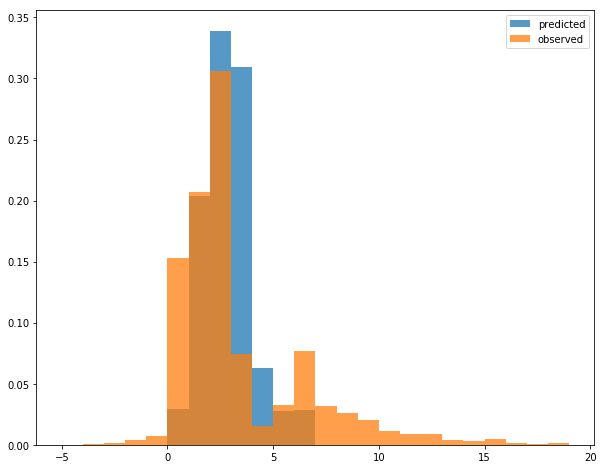

In [111]:
plt.figure(figsize=(10, 8))
plt.hist(pd.Series(lush_y_pred_full), bins=range(-5,20), alpha=0.75, density=True, label='predicted')
plt.hist(pd.Series(y.ravel()), bins=range(-5,20), alpha=0.75, density=True, label='observed')
plt.legend()
plt.show()

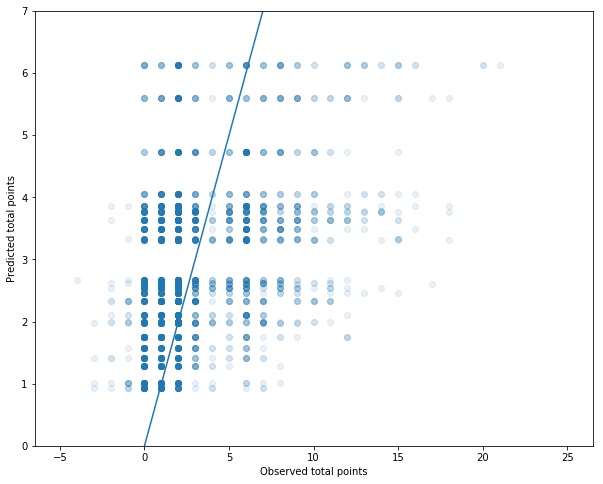

In [112]:
plt.figure(figsize=(10, 8))
plt.scatter(pd.Series(y.ravel()), pd.Series(lush_y_pred_full), alpha=0.1)
plt.plot(np.linspace(-5, 25), np.linspace(-5, 25))
plt.ylabel('Predicted total points')
plt.xlabel('Observed total points')
plt.ylim((0, 7))
plt.show()

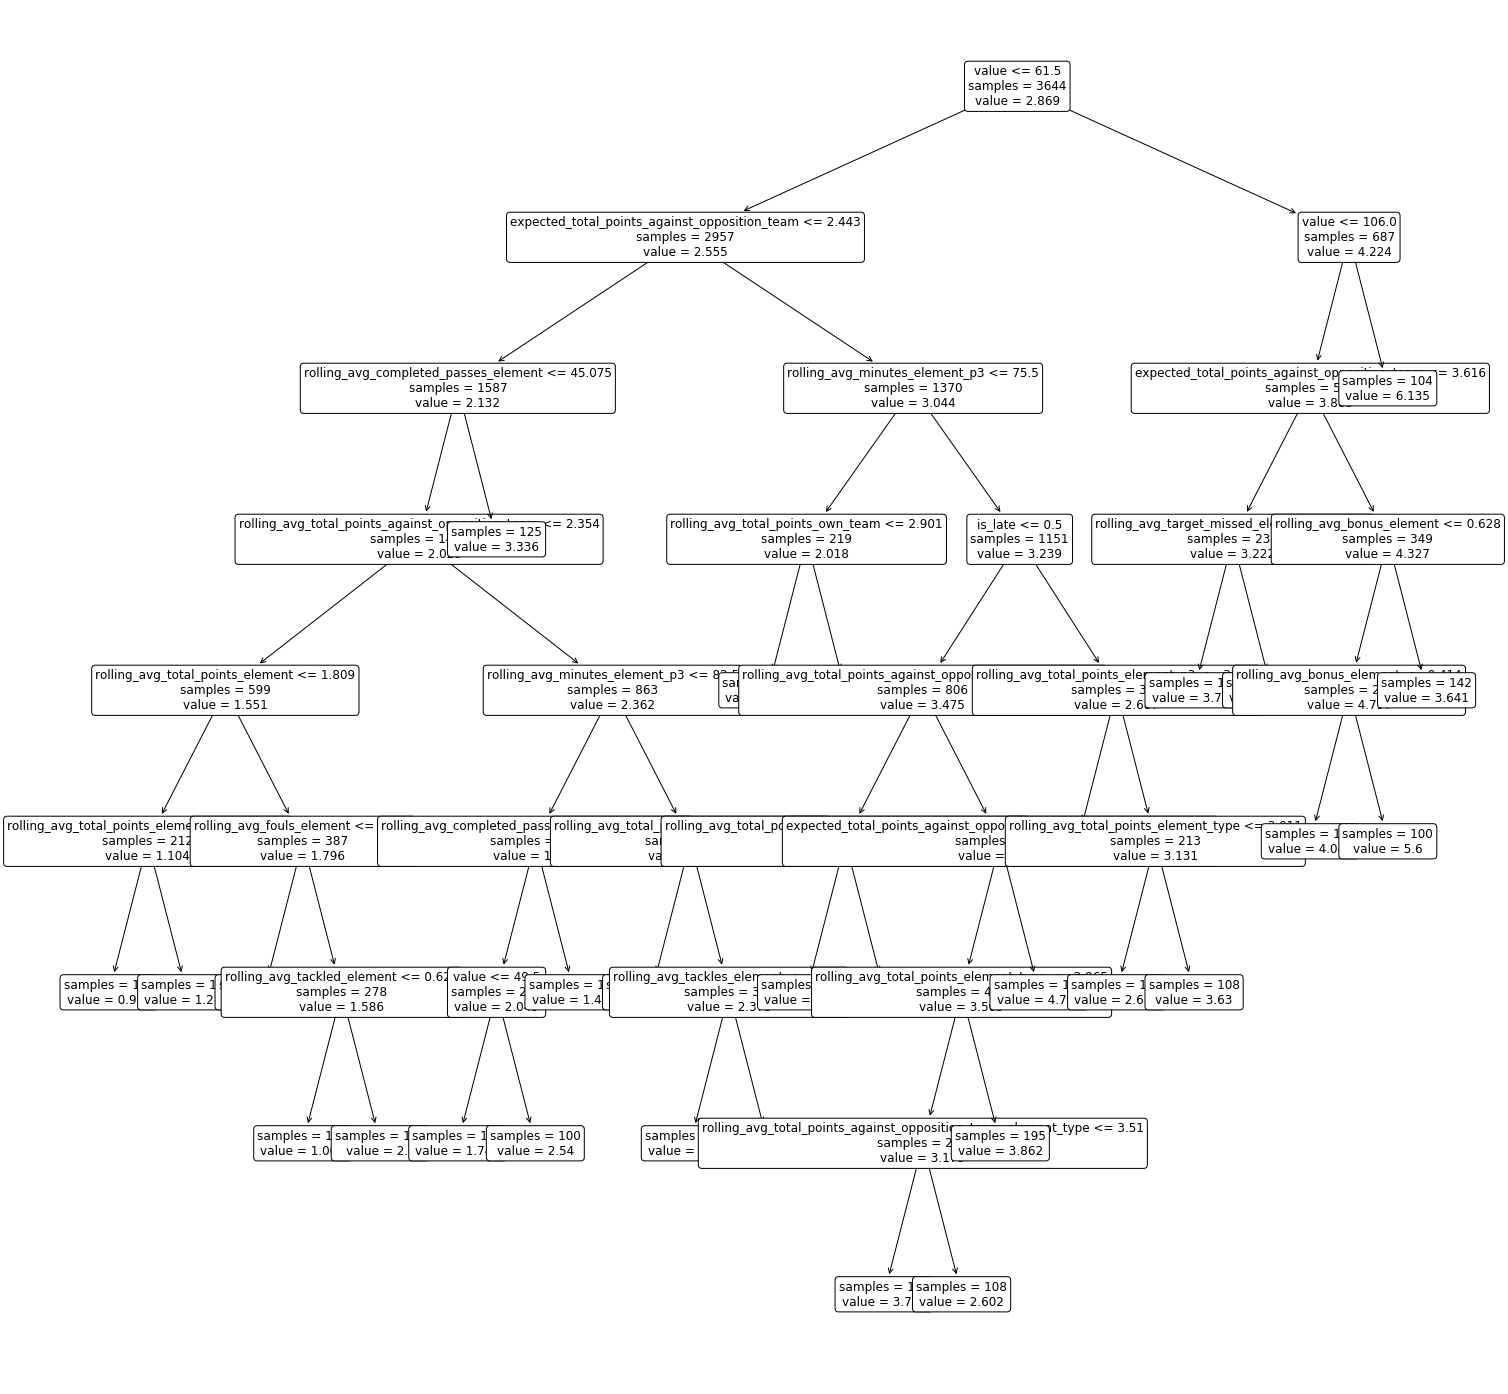

In [113]:
plt.figure(figsize=(25, 25))
plot_tree(
    lush_model_full,
    impurity=False,
    fontsize=12,
    rounded=True,
    feature_names=lush_X_sel.design_info.column_names)
plt.show()

## Decision tree (stark)

In [42]:
stark_model = DecisionTreeRegressor(random_state=0, min_samples_leaf=0.027)
stark_model.fit(stark_X_train_sel, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.027,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [43]:
# get predictions for test set
stark_y_pred = stark_model.predict(stark_X_test_sel).flatten()

# calculate cross entropy loss for test set
stark_test_loss = (
    mean_absolute_error(y_test, stark_y_pred),
    mean_squared_error(y_test, stark_y_pred),
    r2_score(y_test, stark_y_pred)
)
stark_test_loss

(2.2218580634004352, 9.568990731856482, 0.08050783385478799)

In [44]:
# refit model on all data
stark_model_full = DecisionTreeRegressor(random_state=0, min_samples_leaf=0.027)
stark_model_full.fit(stark_X_sel, y.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.027,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [45]:
# get predictions for whole set
stark_y_pred_full = stark_model_full.predict(stark_X_sel).flatten()

# calculate cross entropy loss for test set
stark_test_loss_full = (
    mean_absolute_error(y, stark_y_pred_full),
    mean_squared_error(y, stark_y_pred_full),
    r2_score(y, stark_y_pred_full)
)
stark_test_loss_full

(2.142122107138868, 8.57277375064659, 0.10406828989864769)

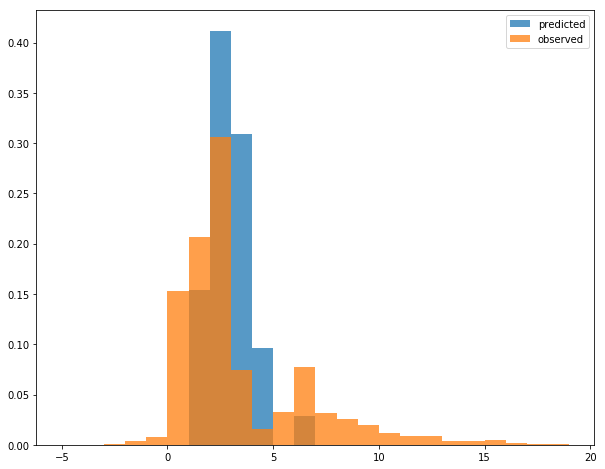

In [46]:
plt.figure(figsize=(10, 8))
plt.hist(pd.Series(stark_y_pred_full), bins=range(-5,20), alpha=0.75, density=True, label='predicted')
plt.hist(pd.Series(y.ravel()), bins=range(-5,20), alpha=0.75, density=True, label='observed')
plt.legend()
plt.show()

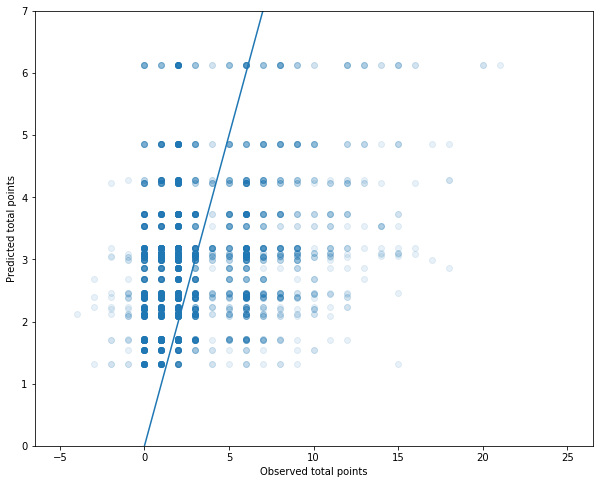

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(pd.Series(y.ravel()), pd.Series(stark_y_pred_full), alpha=0.1)
plt.plot(np.linspace(-5, 25), np.linspace(-5, 25))
plt.ylabel('Predicted total points')
plt.xlabel('Observed total points')
plt.ylim((0, 7))
plt.show()

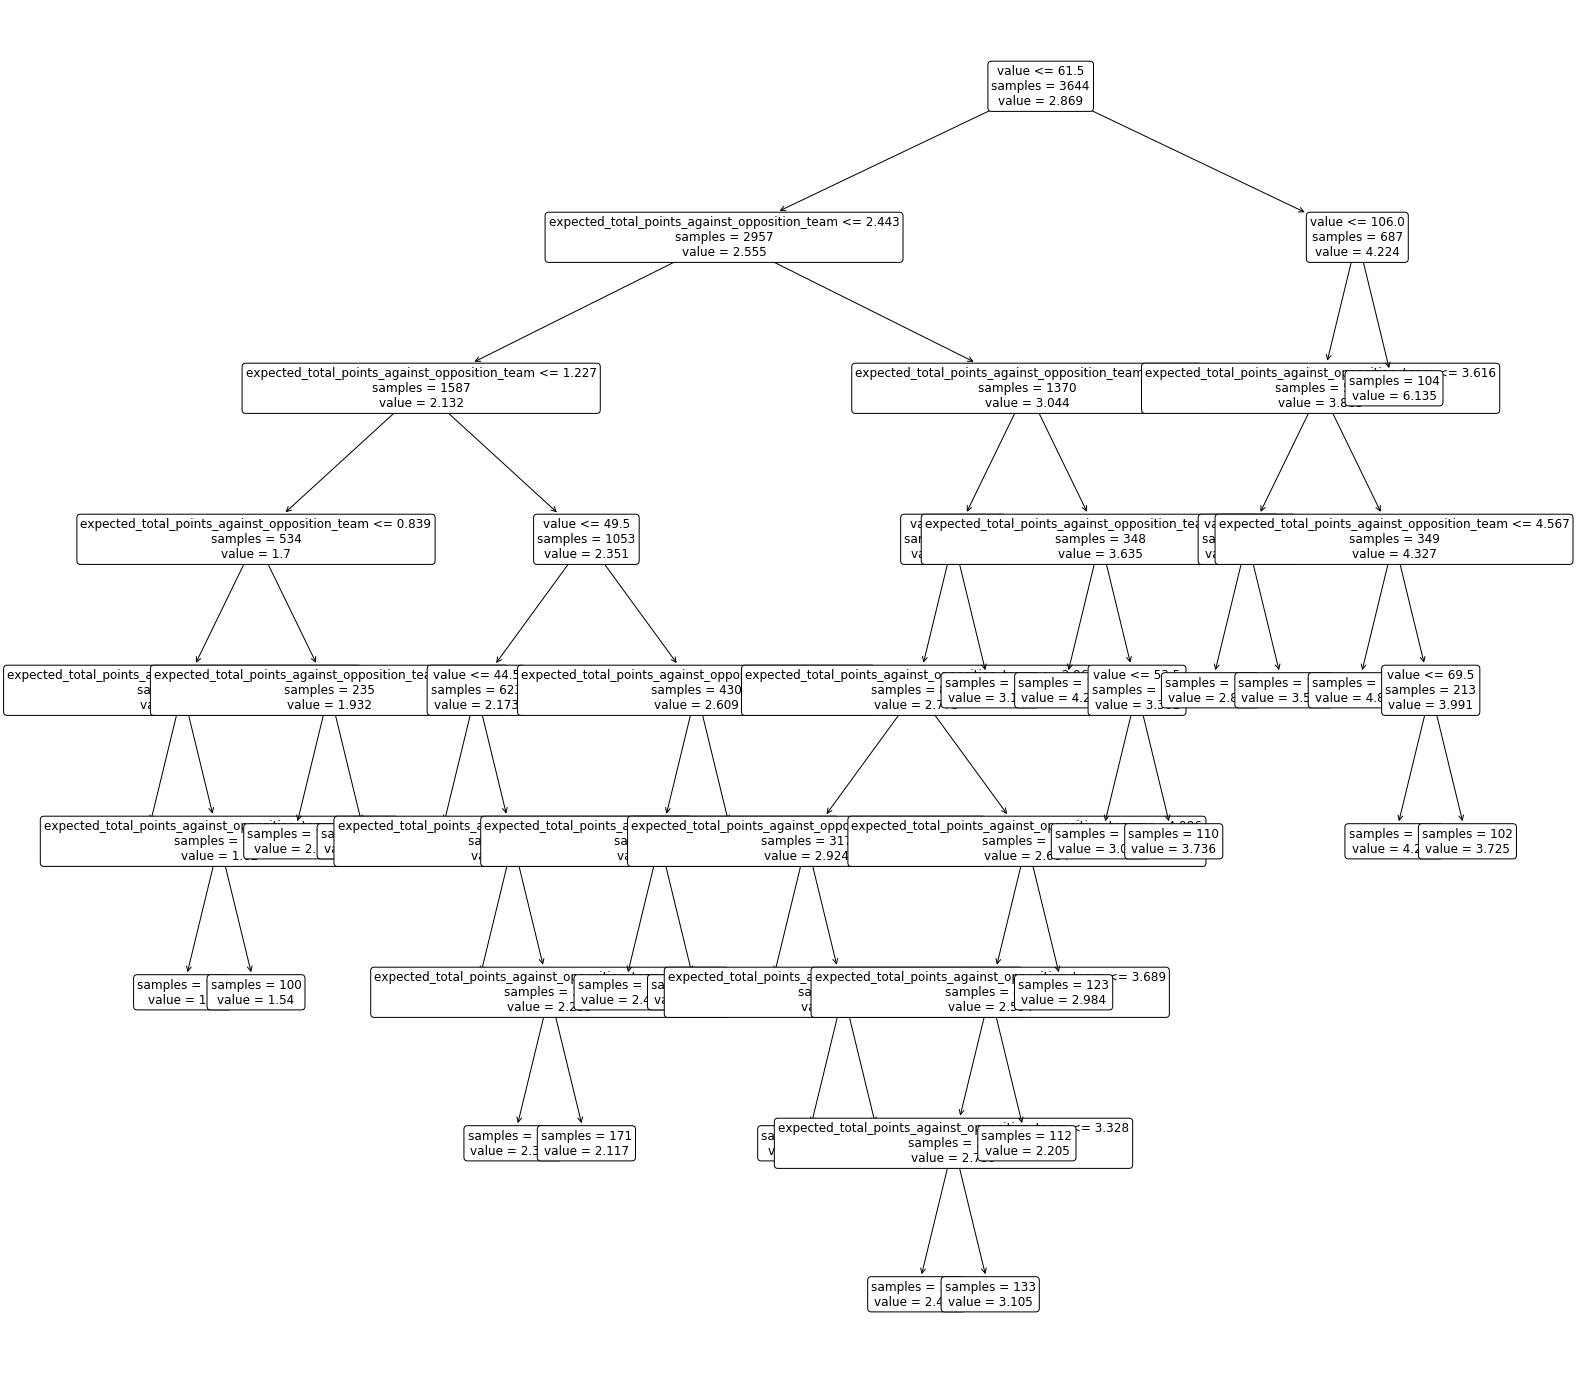

In [48]:
plt.figure(figsize=(25, 25))
plot_tree(
    stark_model_full,
    impurity=False,
    fontsize=12,
    rounded=True,
    feature_names=selected_features.values)
plt.show()

## Summary

In [114]:
pd.DataFrame([
    ('Decision tree (lush)', lush_test_loss[0], lush_test_loss[1], lush_test_loss[2]),
    ('Decision tree (stark)', stark_test_loss[0], stark_test_loss[1], stark_test_loss[2]),
], columns=['model', 'MAE', 'MSE', 'r2'])

,model,MAE,MSE,r2
0,Decision tree (lush),2.232232,9.772003,0.061000
1,Decision tree (stark),2.221858,9.568991,0.080508


In [115]:
pd.DataFrame([
    ('Decision tree (lush)', lush_test_loss_full[0], lush_test_loss_full[1], lush_test_loss_full[2]),
    ('Decision tree (stark)', stark_test_loss_full[0], stark_test_loss_full[1], stark_test_loss_full[2]),
], columns=['model', 'MAE', 'MSE', 'r2'])

,model,MAE,MSE,r2
0,Decision tree (lush),2.063942,8.134941,0.149826
1,Decision tree (stark),2.142122,8.572774,0.104068
